<a href="https://colab.research.google.com/github/meshalalsultan/Tensoflow/blob/main/Predict_Insurance_Cost_For_Customer_Based_on_Their_Situation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


So Based on the Feature (age , sex , bmi , children , smoker , region), i will try to predict the `charges` cost for that case

# The Idea and working plan

I will build Machine Learning Model that can take the needed information from the user and predict the fear cost of insurance .

For that i will use :
 
1. Preprossing the data to fit the model 
2. Build Regresstion model .
3. Evaluate the model .
4. Use the 3 model tacnice to tune the models .
5. Save the best model in h5 format .

## 1. Preprossing The Data

I will to turn the non-numerical columns into number (because **Neural Network** can't handel non-numerical inputs)

I will use function call `get_dummies()` in pandas , it will convert catagorical variable (`sex`,`smoker`,`rigon`) into numerical using one-HotEncoding

In [5]:
# Turn all catagorical into number
insurance_one_hot = pd.get_dummies(insurance) 
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now Split the data into feature(x) and label(y)

In [6]:
# Create x & y values 
x = insurance_one_hot.drop('charges',axis=1)
y= insurance_one_hot['children']

In [7]:
#view the feature
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
# Create the training and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

## Create, Fit and train the Model

In [11]:
# Set the Random Seed
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])
# Fit the model
insurance_model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 1.4586 - mae: 1.4586
Epoch 2/100
34/34 [==============================] - 0s 973us/step - loss: 1.0163 - mae: 1.0163
Epoch 3/100
34/34 [==============================] - 0s 975us/step - loss: 1.0106 - mae: 1.0106
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9947 - mae: 0.9947
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 1.0086 - mae: 1.0086
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9959 - mae: 0.9959
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9909 - mae: 0.9909
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9809 - mae: 0.9809
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9704 - mae: 0.9704
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 0.9656 - mae: 0.9656
Epoch 11/100
34/34 [==============================] - 0

In [12]:
# Check the result
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.3526 - mae: 0.3526


[0.35257720947265625, 0.35257720947265625]

## The (MAE) Meaning 


mae in our model is : 0.3526

that mean our model wrong by 3526 of the cost .

So it give the result with 3526 Gap on the cost .

to get the best result i will get tune the model more expirment . 

My goal is to get Lowest (MAE).

# Tune The Model

To Tune the model i will try 3 things :

- Increasing the number of layers (2 >3).
- Increasing the number of units in eatch layer (except for the output layer).
- Chaninging the optimizer (use Adam).

### Model 2

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss= tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model
history = insurance_model_2.fit(x_train,y_train, epochs=100, verbose=0)

In [16]:
# Evalute the model
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.2895 - mae: 0.2895


[0.28954562544822693, 0.28954562544822693]

Mutch more better .!

Using the Adam optimizer the result is very good from 1st model.



## Check The Loss Curve

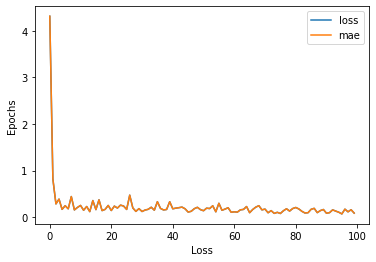

In [18]:
# Plot history ( loss curve )
pd.DataFrame(history.history).plot()
plt.xlabel('Loss')
plt.ylabel('Epochs');

Train the same model for longer , i will add 100 more epochs

In [19]:
history_2 = insurance_model_2.fit(x_train,y_train, epochs=100, verbose=0)

How did the extra 100 training go ?

In [20]:
# Evalute the model for 200 total epochs

insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(x_test,y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 0.1716 - mae: 0.1716


(0.17158864438533783, 0.17158864438533783)

Traning for 100 extra epoch give about 45% decress in error.

How about the visulize.?

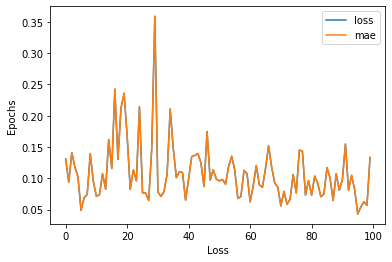

In [21]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('Loss')
plt.ylabel('Epochs'); #Note it will show only 100 since i overrid the history variable

# Preprossing the data ( normalization )

**Normalization** : is Scalling the value from their orginal to 0 and 1.

**The Nural Network tend to prefer normalization**

In [22]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create columns transformer (this will help my normalize/preprossing the data)
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']), #get all value between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'),['sex', 'smoker', 'region'])
)

# Create x and y
x= insurance.drop('charges',axis=1)
y= insurance['charges']

# Split to train and test
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

# Fit coulmns transformed on the training data ONLY
ct.fit(x_train)

# Transform training and test data with normaliztion and OneHotEncoding
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


Check what the data look now .?

In [25]:
# Non normalize data
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [26]:
# Normlize data
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [27]:
# Chack the shape ( it will be larger becouse the one hot encoding and normalization that will make extra columns)
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))

Ready and good to Modeling 

## Model 3

In [32]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model
insurance_model_3.fit(x_train_normal,y_train, epochs=500,verbose=0)

Evalute the model with normalize data

In [33]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.7495 - mae: 3160.7495


From this we can see normilzing the data result in 10% less error using the same model than not normalizing the data.


# Save The Model

In [35]:
insurance_model_2.save('Insurance Model_2.h5')

In [36]:
!ls Insurance\ Model_2.h5

'Insurance Model_2.h5'


In [37]:
loaded_model = tf.keras.models.load_model('Insurance Model_2.h5')
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


# Download The Model From Colab

In [39]:
from google.colab import files
files.download('Insurance Model_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>